![](../Assets/itd.png)
    
# Inteligencia Artificial 
## Arboles de decisión DataSet Titanic
### José Gabriel Rodriguez Rivas    
### Angel Omar Ceniceros Berumen

Con los datos de arriba, ¿qué tipos de preguntas podemos hacer acerca de los factores que contribuyeron a que los pasajeros sobrevivan o fallecieran en la catástrofe del Titanic?


**Podríamos preguntarnos si la clase social fue un factor importante o si el ser mujer pudo haber ayudado en sobrevivir. Dependiendo de las predicciones es mejor viajar solo o con familia.**

### Paso 1: Crear la estructura de datos

In [1]:
#Code cell 1
#import pandas
import pandas as pd

#create a pandas dataframe called "training" from the titanic-train.csv file
training = pd.read_csv("./Data/titanic-train.csv")

In [2]:
#Code cell 2
#verify the contents of the training dataframe using the pandas info() method.
training.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 915 entries, 0 to 914
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  915 non-null    int64  
 1   Survived     915 non-null    int64  
 2   Pclass       915 non-null    int64  
 3   Name         915 non-null    object 
 4   Gender       915 non-null    object 
 5   Age          738 non-null    float64
 6   SibSp        915 non-null    int64  
 7   Parch        915 non-null    int64  
 8   Ticket       915 non-null    object 
 9   Fare         915 non-null    float64
 10  Cabin        202 non-null    object 
 11  Embarked     914 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 85.9+ KB


**¿Faltan valores en el conjunto de datos?**

Sí, al parecer no se pudieron registrar todas las edades de los pasajeros y los camarote en los cuales se hospedaron

In [3]:
#Code cell 3
#view the first few rows of the data
training.head()

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,B71,S
1,2,0,3,"Asim, Mr. Adola",male,35.0,0,0,SOTON/O.Q. 3101310,7.0500,NaN,S
2,3,0,3,"Nankoff, Mr. Minko",male,NaN,0,0,349218,7.8958,NaN,S
3,4,0,1,"Thayer, Mr. John Borland",male,49.0,1,1,17421,110.8833,C68,C
4,5,0,3,"Strandberg, Miss. Ida Sofia",female,22.0,0,0,7553,9.8375,NaN,S


### Paso 2: Preparar los datos para el modelo de árbol de decisiones¶


In [4]:
#code cell 4
training["Gender"] = training["Gender"].apply(lambda toLabel: 0 if toLabel == 'male' else 1)

In [5]:
#code cell 5
#view the first few rows of the data again}
training['Gender'].head()

0    0
1    0
2    0
3    0
4    1
Name: Gender, dtype: int64

In [6]:
#code cell 6
training["Age"].fillna(training["Age"].mean(), inplace=True)

In [7]:
#code cell 7
#verify that the missing values for the age variable have been eliminated.
#answers may vary
training['Age'].head()

0    31.000000
1    35.000000
2    29.970867
3    49.000000
4    22.000000
Name: Age, dtype: float64

In [8]:
training.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 915 entries, 0 to 914
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  915 non-null    int64  
 1   Survived     915 non-null    int64  
 2   Pclass       915 non-null    int64  
 3   Name         915 non-null    object 
 4   Gender       915 non-null    int64  
 5   Age          915 non-null    float64
 6   SibSp        915 non-null    int64  
 7   Parch        915 non-null    int64  
 8   Ticket       915 non-null    object 
 9   Fare         915 non-null    float64
 10  Cabin        202 non-null    object 
 11  Embarked     914 non-null    object 
dtypes: float64(2), int64(6), object(4)
memory usage: 85.9+ KB


¿Cuál es el valor que se utilizó para reemplazar a las edades faltantes?

**Respuesta** Se uso el promedio de las edades de todos los pasajeros a los cuales se pudieron registrar la edad

### Paso 3: Entrenar y calificar el modelo del árbol de decisiones

In [9]:
#code cell 8
#create the array for the target values
y_target = training["Survived"].values

In [10]:
#code cell 9
columns = ["Fare", "Pclass", "Gender", "Age", "SibSp"]
#create the variable to hold the features that the classifier will use
X_input = training[list(columns)].values

In [11]:
#code cell 10
#import the tree module from the sklearn library
from sklearn import tree

#create clf_train as a decision tree classifier object
clf_train = tree.DecisionTreeClassifier(criterion="entropy", max_depth=3)

#train the model using the fit() method of the decision tree object. 
#Supply the method with the input variable X_input and the target variable y_target
clf_train = clf_train.fit(X_input, y_target)

In [12]:
#code cell 11
clf_train.score(X_input,y_target)

0.8163934426229508

### Paso 4: Visualizar el árbol

In [13]:
clasificacion = ['SOBREVIVE','NO SOBREVIVE']

In [14]:

#code cell 12
#from sklearn.externals.six import StringIO
import sklearn
with open("./Data/titanic.dot", 'w') as f:
  f = tree.export_graphviz(clf_train, out_file=f, feature_names=columns,
                          class_names=clasificacion)


In [15]:
#code cell 13
#run the Graphviz dot command to convert the .dot file to .png
!dot -Tpng ./Data/titanic.dot -o ./Data/titanic.png


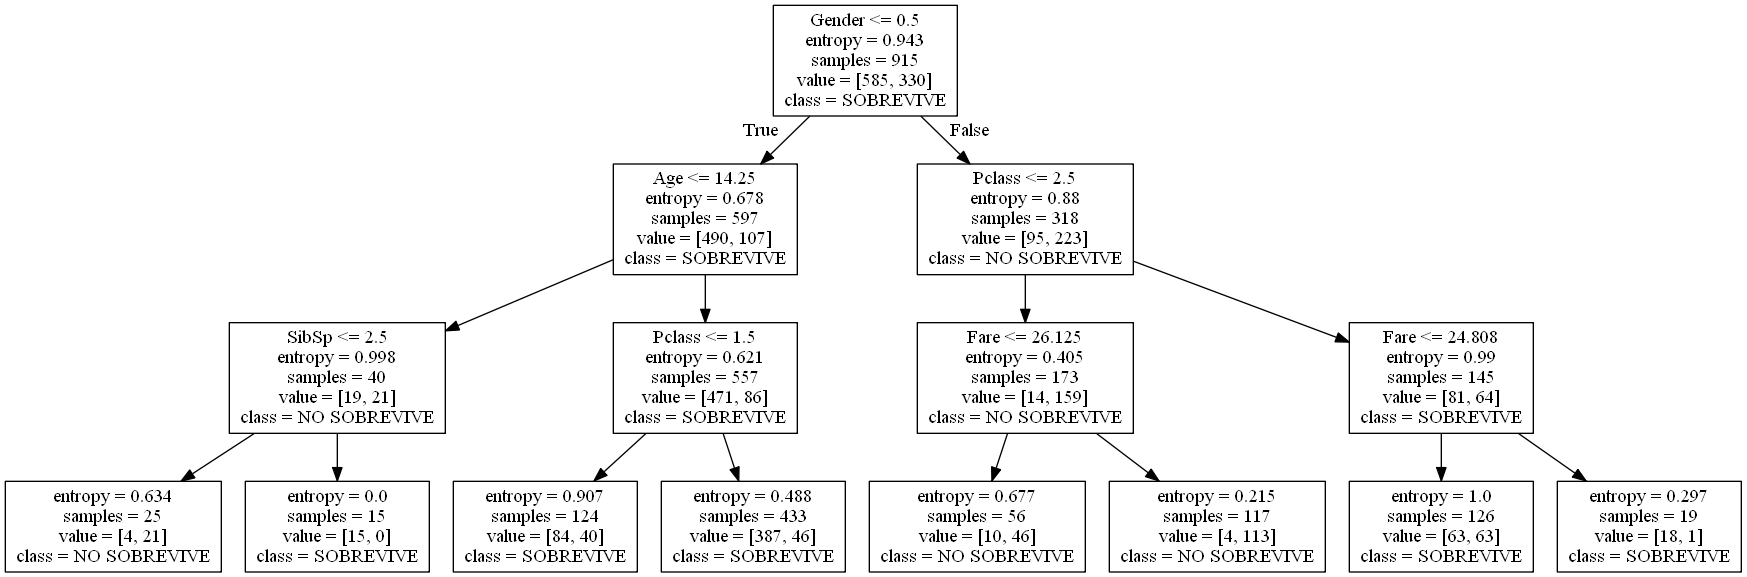

In [16]:
#code cell 14
#import the Image module from the Ipython.display libary
from IPython.display import Image

#display the decison tree graphic
Image("./Data/titanic.png")

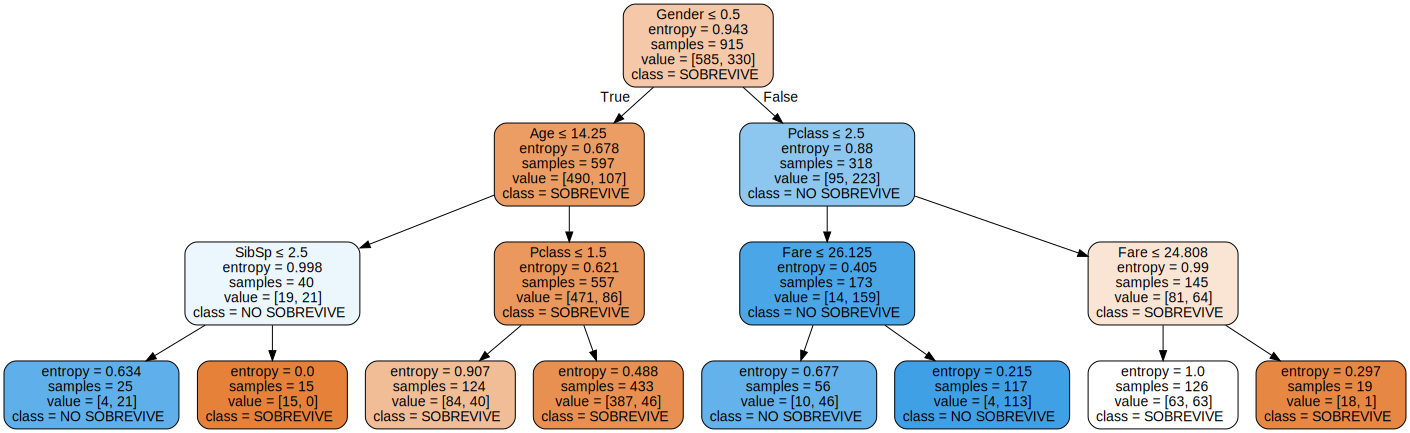

In [17]:
import graphviz
dot_data = tree.export_graphviz(
    clf_train,
    out_file = None,
    class_names = clasificacion,
    
    feature_names = columns,
    filled= True,
    rounded= True,
    special_characters = True
)
graph = graphviz.Source(dot_data)
graph.render('TITANICCOLLOR',format='png')
graph

¿Qué describe al grupo que tenía mayor cantidad de víctimas fatales? ¿Qué grupo tenía la mayor cantidad de sobrevivientes?

**Respuesta** PRacticamente el ser mujer fue una ventaja que ayudo a un pasajero a sobrevivir, lo que describe a este grupo es que practicamente habia pocas probabilidades de no sobrevivir, literalmente tenias que ser una mujer menor de 14 años  y sin hermanos para morir, en pocas palabras una mujer menor de 14 sola, sin nadie moria, lo cual era imposible que una niña viajara sola

### Parte 2: Aplicar el modelo del árbol de decisiones

### Paso 1: Importar y elaborar los datos
En este paso, importará y preparará los datos para el análisis.



In [18]:
#code cell 15
#import the file into the 'testing' dataframe.
testing = pd.read_csv("./Data/titanic-test.csv")

In [19]:
testing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 393 entries, 0 to 392
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  393 non-null    int64  
 1   Survived     393 non-null    int64  
 2   Pclass       393 non-null    int64  
 3   Name         393 non-null    object 
 4   Gender       393 non-null    object 
 5   Age          307 non-null    float64
 6   SibSp        393 non-null    int64  
 7   Parch        393 non-null    int64  
 8   Ticket       393 non-null    object 
 9   Fare         393 non-null    float64
 10  Cabin        93 non-null     object 
 11  Embarked     392 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 37.0+ KB


##### ¿Cuántos registros hay en el conjunto de datos?
Hay 393 registros (renglones)


##### ¿Qué variable(s) importante(s) son valores faltantes y cuántas faltan?

El camarote y la edad, esos son factores que influyeron mucho para que alguien sobreviviera o no, sin contar la clase.
Al campo sexo le faltan 86 registros y a la cabina o camarote 300

In [20]:
#code cell 16
#replace the Gender labels in the testing dataframe
testing["Gender"] = testing["Gender"].apply(lambda toLabel: 0 if toLabel == 'male' else 1)

In [21]:
#code cell 17
#Use the fillna method of the testing dataframe column "Age" 
#to replace missing values with the mean of the age values.
testing["Age"].fillna(testing["Age"].mean(), inplace=True)

In [22]:
#code cell 18
#verify the data preparation steps. Enter and run both methods from here, by entering and running one and then the other.
testing.head(10)

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,916,0,2,"Coleridge, Mr. Reginald Charles",0,29.00000,0,0,W./C. 14263,10.5000,NaN,S
1,917,1,1,"Spedden, Mrs. Frederic Oakley (Margaretta Corn...",1,40.00000,1,1,16966,134.5000,E34,C
2,918,0,3,"Windelov, Mr. Einar",0,21.00000,0,0,SOTON/OQ 3101317,7.2500,NaN,S
3,919,1,1,"Minahan, Miss. Daisy E",1,33.00000,1,0,19928,90.0000,C78,Q
4,920,1,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.00000,1,0,363272,7.0000,NaN,S
5,921,0,3,"Abbott, Mr. Rossmore Edward",0,16.00000,1,1,C.A. 2673,20.2500,NaN,S
6,922,0,3,"Karlsson, Mr. Nils August",0,22.00000,0,0,350060,7.5208,NaN,S
7,923,0,3,"Connaghton, Mr. Michael",0,31.00000,0,0,335097,7.7500,NaN,Q
8,924,0,3,"Foley, Mr. William",0,29.56569,0,0,365235,7.7500,NaN,Q
9,925,0,2,"Leyson, Mr. Robert William Norman",0,24.00000,0,0,C.A. 29566,10.5000,NaN,S


In [23]:
#code cell 19
#create the variable X_input to hold the features that the classifier will use
X_input = testing[list(columns)].values

### HAcer predicciones con el metodo predict del clasificador
Utilice el método predict() del objeto clf_train que se entrenó para etiquetar las observaciones en el conjunto de datos de prueba con la clasificación de supervivencia más probable. Considere el arreglo de variables de entrada del conjunto de datos de prueba como el parámetro para este método.

In [24]:
#code cell 20
#apply the model to the testing data and store the result in a pandas dataframe.
#Use X_input as the argurment for the predict() method of the clf_train classifier object

target_labels = clf_train.predict(X_input)

#convert the target array into a pandas dataframe using the pd.DataFrame() method and target as argument
target_labels = pd.DataFrame({'Est_Survival':target_labels, 'Name':testing['Name']})

#display the first few rows of the data set
target_labels.head()

,Est_Survival,Name
0,0,"Coleridge, Mr. Reginald Charles"
1,1,"Spedden, Mrs. Frederic Oakley (Margaretta Corn..."
2,0,"Windelov, Mr. Einar"
3,1,"Minahan, Miss. Daisy E"
4,0,"Wilkes, Mrs. James (Ellen Needs)"


In [25]:
#code cell 21
#import the numpy library as np
import numpy as np
# Load data for all passengers in the variable all_data
all_data = pd.read_csv("./Data/titanic_all.csv")
# Merging using the field Name as key, selects only the rows of the two datasets that refer to the same passenger
testing_results = pd.merge(target_labels, all_data[['Name','Survived']], on=['Name'])

# Compute the accuracy as a ratio of matching observations to total osbervations. Store this in in the variable acc.
acc = np.sum(testing_results['Est_Survival'] == testing_results['Survived']) / float(len(testing_results))
# Print the result
acc

0.7588832487309645

### Parte 3: Evaluar el modelo del árbol de decisiones

In [26]:
#code cell 22
#import the titanic_all.csv file into a dataframe called all_data. Specify the list of columns to import.
all_data = pd.read_csv("./Data/titanic_all.csv", usecols=['Survived','Pclass','Gender','Age','SibSp','Fare'])
#View info for the new dataframe
all_data.head()


,Survived,Pclass,Gender,Age,SibSp,Fare
0,1,1,female,29.0000,0,211.3375
1,1,1,male,0.9167,1,151.5500
2,0,1,female,2.0000,1,151.5500
3,0,1,male,30.0000,1,151.5500
4,0,1,female,25.0000,1,151.5500


In [60]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1045 entries, 0 to 1307
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  1045 non-null   int64  
 1   Pclass    1045 non-null   int64  
 2   Gender    1045 non-null   int64  
 3   Age       1045 non-null   float64
 4   SibSp     1045 non-null   int64  
 5   Fare      1045 non-null   float64
dtypes: float64(2), int64(4)
memory usage: 57.1 KB


#### ¿Cuántos registros hay en el conjunto de datos?

Hay 1045

#### ¿Qué variable(s) importante(s) son valores faltantes y cuántas faltan?

Al parecer todas estan completas


In [27]:
#code cell 23
#Label the gender variable with 0 and 1
all_data["Gender"] = all_data["Gender"].apply(lambda toLabel: 0 if toLabel == 'male' else 1)
#code cell 24
#replace missing Age values with the mean age

all_data["Age"].fillna(training["Age"].mean(), inplace=True)


In [28]:
#display the first few rows of the data set
all_data.head(10)

,Survived,Pclass,Gender,Age,SibSp,Fare
0,1,1,1,29.0000,0,211.3375
1,1,1,0,0.9167,1,151.5500
2,0,1,1,2.0000,1,151.5500
3,0,1,0,30.0000,1,151.5500
4,0,1,1,25.0000,1,151.5500
5,1,1,0,48.0000,0,26.5500
6,1,1,1,63.0000,1,77.9583
7,0,1,0,39.0000,0,0.0000
8,1,1,1,53.0000,2,51.4792
9,0,1,0,71.0000,0,49.5042


In [29]:
#code cell 25
#Import train_test_split() from the sklearn.model_selection libary 
#from sklearn.cross_validation import train_test_split
from sklearn.model_selection import train_test_split

#create the input and target variables as uppercase X and lowercase y. Reuse the columns variable.
X = all_data[list(columns)].values
y = all_data["Survived"].values

#generate the four testing and training data arrays with the train_test_split() method
X_train,X_test,y_train,y_test=train_test_split(X, y, test_size=0.40, random_state=0)

In [30]:
type(X_train)

numpy.ndarray

In [31]:
#code cell 26
#create the training decision tree object
clf_train = tree.DecisionTreeClassifier(criterion="entropy", max_depth=3)

#fit the training model using the input and target variables
clf_train = clf_train.fit(X_train, y_train)

In [32]:
#code cell 27
#score the model on the two datasets and store the scores in variables. Convert the scores to strings using str()
train_score = str(clf_train.score(X_train,y_train))
test_score = str(clf_train.score(X_test,y_test))

#output the values in a test string
print('Training score = '+ train_score+' Testing score = '+test_score)

Training score = 0.8201530612244898 Testing score = 0.8053435114503816


## Tarea

1. Eliminar las observaciones con valores de edad faltantes
El uso de un promedio para reemplazar los valores de edad faltantes puede afectar la precisión del modelo. Una solución para esto puede ser eliminar todas las observaciones con valores de edad faltantes. Si bien esto reducirá el tamaño del conjunto de datos de entrenamiento, podría mejorar la precisión.

In [33]:
#create a pandas dataframe called "training" from the titanic-train.csv file
training = pd.read_csv("./Data/titanic-train.csv")
training["Gender"] = training["Gender"].apply(lambda toLabel: 0 if toLabel == 'male' else 1)

In [34]:
training.head()

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,1,"Davidson, Mr. Thornton",0,31.0,1,0,F.C. 12750,52.0000,B71,S
1,2,0,3,"Asim, Mr. Adola",0,35.0,0,0,SOTON/O.Q. 3101310,7.0500,NaN,S
2,3,0,3,"Nankoff, Mr. Minko",0,NaN,0,0,349218,7.8958,NaN,S
3,4,0,1,"Thayer, Mr. John Borland",0,49.0,1,1,17421,110.8833,C68,C
4,5,0,3,"Strandberg, Miss. Ida Sofia",1,22.0,0,0,7553,9.8375,NaN,S


In [35]:
training.dropna(subset=['Age'],inplace=True)

In [38]:
#code cell 8
#create the array for the target values
y_target = training["Survived"].values

In [39]:
#code cell 9
columns = ["Fare", "Pclass", "Gender", "Age", "SibSp"]
#create the variable to hold the features that the classifier will use
X_input = training[list(columns)].values

In [40]:
#code cell 10
#import the tree module from the sklearn library
from sklearn import tree

#create clf_train as a decision tree classifier object
clf_train = tree.DecisionTreeClassifier(criterion="entropy", max_depth=3)

#train the model using the fit() method of the decision tree object. 
#Supply the method with the input variable X_input and the target variable y_target
clf_train = clf_train.fit(X_input, y_target)

In [41]:
#code cell 11
clf_train.score(X_input,y_target)

0.8252032520325203

In [42]:
#code cell 12
#from sklearn.externals.six import StringIO
import sklearn
with open("./Data/titanic.dot", 'w') as f:
  f = tree.export_graphviz(clf_train, out_file=f, feature_names=columns)


In [43]:
#code cell 13
#run the Graphviz dot command to convert the .dot file to .png
!dot -Tpng ./Data/titanic.dot -o ./Data/titanic.png

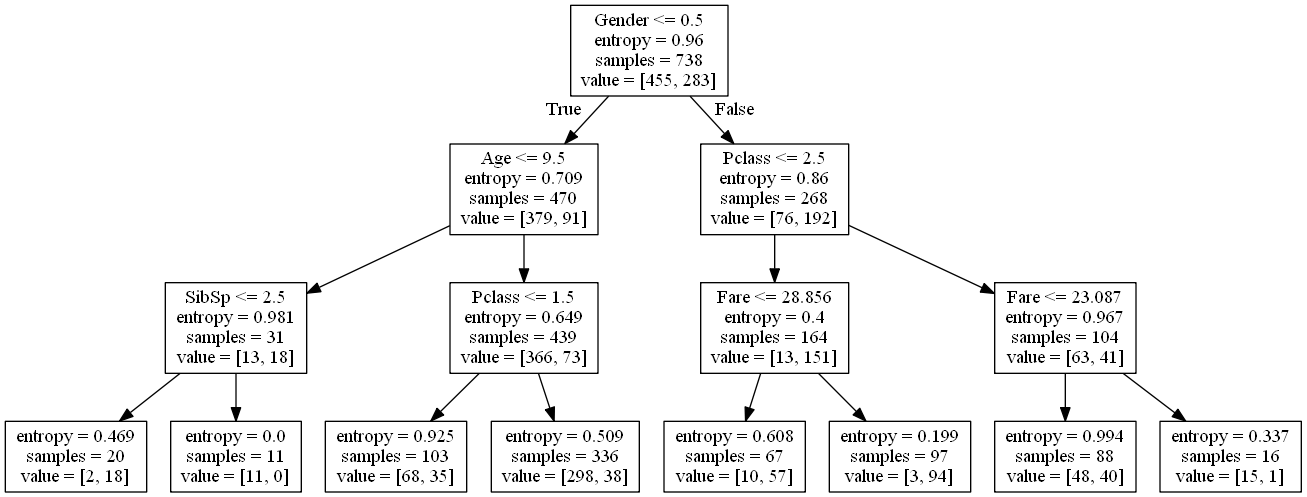

In [44]:
#code cell 14
#import the Image module from the Ipython.display libary
from IPython.display import Image

#display the decison tree graphic
Image("./Data/titanic.png")


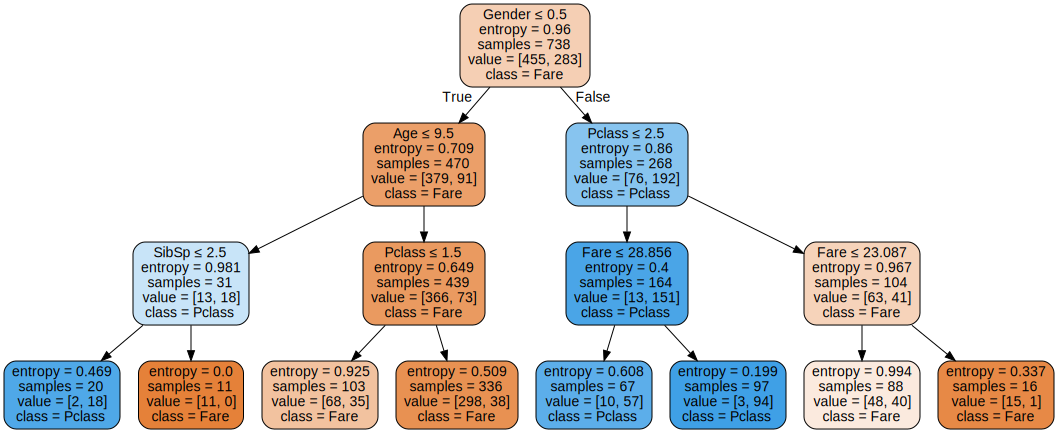

In [45]:
import graphviz
dot_data = tree.export_graphviz(
    clf_train,
    out_file = None,
    class_names = columns,
    feature_names = columns,
    filled= True,
    rounded= True,
    special_characters = True
)
graph = graphviz.Source(dot_data)
graph.render('TITANICCOLLOR',format='png')
graph


### Parte 2: Aplicar el modelo del árbol de decisiones

In [46]:
#code cell 15
#import the file into the 'testing' dataframe.
testing = pd.read_csv("./Data/titanic-test.csv")


In [47]:
#code cell 16
#replace the Gender labels in the testing dataframe
testing["Gender"] = testing["Gender"].apply(lambda toLabel: 0 if toLabel == 'male' else 1)


In [48]:
testing.dropna(subset=['Age'],inplace=True)
testing.head()

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,916,0,2,"Coleridge, Mr. Reginald Charles",0,29.0,0,0,W./C. 14263,10.50,NaN,S
1,917,1,1,"Spedden, Mrs. Frederic Oakley (Margaretta Corn...",1,40.0,1,1,16966,134.50,E34,C
2,918,0,3,"Windelov, Mr. Einar",0,21.0,0,0,SOTON/OQ 3101317,7.25,NaN,S
3,919,1,1,"Minahan, Miss. Daisy E",1,33.0,1,0,19928,90.00,C78,Q
4,920,1,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.0,1,0,363272,7.00,NaN,S


In [49]:
#code cell 19
#create the variable X_input to hold the features that the classifier will use
X_input = testing[list(columns)].values

In [51]:
#code cell 20
#apply the model to the testing data and store the result in a pandas dataframe.
#Use X_input as the argurment for the predict() method of the clf_train classifier object

target_labels = clf_train.predict(X_input)

#convert the target array into a pandas dataframe using the pd.DataFrame() method and target as argument
target_labels = pd.DataFrame({'Est_Survival':target_labels, 'Name':testing['Name']})

#display the first few rows of the data set
target_labels.head()



,Est_Survival,Name
0,0,"Coleridge, Mr. Reginald Charles"
1,1,"Spedden, Mrs. Frederic Oakley (Margaretta Corn..."
2,0,"Windelov, Mr. Einar"
3,1,"Minahan, Miss. Daisy E"
4,0,"Wilkes, Mrs. James (Ellen Needs)"


In [52]:
#code cell 21
#import the numpy library as np
import numpy as np
# Load data for all passengers in the variable all_data
all_data = pd.read_csv("./Data/titanic_all.csv")
# Merging using the field Name as key, selects only the rows of the two datasets that refer to the same passenger
testing_results = pd.merge(target_labels, all_data[['Name','Survived']], on=['Name'])

# Compute the accuracy as a ratio of matching observations to total osbervations. Store this in in the variable acc.
acc = np.sum(testing_results['Est_Survival'] == testing_results['Survived']) / float(len(testing_results))
# Print the result
acc



0.762987012987013

In [53]:

#code cell 22
#import the titanic_all.csv file into a dataframe called all_data. Specify the list of columns to import.
all_data = pd.read_csv("./Data/titanic_all.csv", usecols=['Survived','Pclass','Gender','Age','SibSp','Fare'])
#View info for the new dataframe



In [54]:
#code cell 23
#Label the gender variable with 0 and 1
all_data["Gender"] = all_data["Gender"].apply(lambda toLabel: 0 if toLabel == 'male' else 1)
#code cell 24
#replace missing Age values with the mean age
all_data.dropna(subset=['Age'],inplace=True)

In [55]:
#display the first few rows of the data set
all_data.head(10)

,Survived,Pclass,Gender,Age,SibSp,Fare
0,1,1,1,29.0000,0,211.3375
1,1,1,0,0.9167,1,151.5500
2,0,1,1,2.0000,1,151.5500
3,0,1,0,30.0000,1,151.5500
4,0,1,1,25.0000,1,151.5500
5,1,1,0,48.0000,0,26.5500
6,1,1,1,63.0000,1,77.9583
7,0,1,0,39.0000,0,0.0000
8,1,1,1,53.0000,2,51.4792
9,0,1,0,71.0000,0,49.5042


In [56]:


#code cell 25
#Import train_test_split() from the sklearn.model_selection libary 
#from sklearn.cross_validation import train_test_split
from sklearn.model_selection import train_test_split

#create the input and target variables as uppercase X and lowercase y. Reuse the columns variable.
X = all_data[list(columns)].values
y = all_data["Survived"].values

#generate the four testing and training data arrays with the train_test_split() method
X_train,X_test,y_train,y_test=train_test_split(X, y, test_size=0.40, random_state=0)



In [57]:

type(X_train)

numpy.ndarray

In [58]:
#code cell 26
#create the training decision tree object
clf_train = tree.DecisionTreeClassifier(criterion="entropy", max_depth=3)

#fit the training model using the input and target variables
clf_train = clf_train.fit(X_train, y_train)



In [59]:

#code cell 27
#score the model on the two datasets and store the scores in variables. Convert the scores to strings using str()
train_score = str(clf_train.score(X_train,y_train))
test_score = str(clf_train.score(X_test,y_test))

#output the values in a test string
print('Training score = '+ train_score+' Testing score = '+test_score)

Training score = 0.8165869218500797 Testing score = 0.8086124401913876


##### **Reflexion**: que diferencias  se obtuvieron al ejecutar el entrenamiento, eliminando los valores nulos de la edad.


#####  **1 Fue más eectivo?**
No podría decir si fue más efectivo ya que todo esto es predictivo, pero podría afirmar que podría ser un poco menos  preciso ya que las puntaciones son un poco más bajas debido a la falta de datos que tuvimos que eliminar, pero pude ser que sea mas real debido a esto 
##### **2 Que porcentaje se obtuvo**
0.8086124401913876 insisto en que puede ser más bajo debido a la asencia de datos
#####  **3 Conclusiones**
Quedo demostrado que ser mujer y tener buena clase en el barco (camarote) influia mucho ya que al momento de la evacuacion por así decirle, les dieron prioridad a las mujeres, especificamente a las de primera clase, creo que los arboles binarios de decision en conjunto de esta practica son un gran ejemplo de el aprendisaje supervisado ya que teniamos etiquetas de informacion como sexo, edad, y demas variables y tuvimos que convertirlas a numeros para poder interpretarlas, además que despues de crear el modelo con ciertos datos tuvimos que entrenarlo con el restante de datos